In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [203]:
spotify_df_org = pd.read_csv('data/raw/Spotify-dataset.csv', index_col='index')


In [204]:
display(spotify_df_org.info())
display(spotify_df_org.isnull().sum())
display(spotify_df_org[spotify_df_org.duplicated()].shape)

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

None

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

(450, 20)

In [205]:
df_cleaned = spotify_df_org.dropna()
df_cleaned = df_cleaned.sort_values(by='popularity', ascending=False)
#df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.drop_duplicates(subset=['track_id','artists', 'track_name'])
print(df_cleaned.shape)
#display(df_cleaned[df_cleaned.duplicated(subset='track_id')])

(89740, 20)


In [206]:
df_cleaned.skew(numeric_only=True)

popularity           0.071278
duration_ms         11.072801
explicit             2.956805
danceability        -0.398292
energy              -0.559993
key                 -0.000142
loudness            -1.959879
mode                -0.569697
speechiness          4.545835
acousticness         0.655772
instrumentalness     1.563997
liveness             2.062092
valence              0.127637
tempo                0.182744
time_signature      -3.998811
dtype: float64

In [207]:
df_cleaned['key'].unique()

array([ 2,  7,  5,  1,  9,  0,  3,  6,  8, 10,  4, 11])

In [208]:
from src.transformation import key_cyclic_encoding

key_cyclic_encoding(df_cleaned, 'key')

        key       key_sin   key_cos
index                              
107858    0  0.000000e+00  1.000000
105406    6  1.224647e-16 -1.000000
36823    11 -5.000000e-01  0.866025 



In [209]:
df_cleaned

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,key_sin,key_cos
index,,,,,,,,,,,,,,,,,,,,,
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.4720,2,...,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance,0.866025,0.500000
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.7820,2,...,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop,0.866025,0.500000
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.6790,7,...,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae,-0.500000,-0.866025
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.9650,7,...,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm,-0.500000,-0.866025
68304,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.7150,5,...,0.2530,0.09930,0.000291,0.126,0.187,106.672,4,latino,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64891,0TtaAamcGe5CJbMazy2nxv,Mel Tormé,All I Want For Christmas Is You,The Christmas Song - Live At The Crescendo Clu...,0,185266,False,0.413,0.0417,1,...,0.0350,0.94800,0.000000,0.120,0.225,100.098,1,jazz,0.500000,0.866025
64890,7KvE6pHVijDMMWjJ0DypKJ,Mel Tormé,Christmas Best Hits 2022,The Christmas Song - Live At The Crescendo Clu...,0,185266,False,0.413,0.0417,1,...,0.0350,0.94800,0.000000,0.120,0.225,100.098,1,jazz,0.500000,0.866025
64888,1to8N5c31zyFz0c3AahJs7,Mel Tormé,Thanksgiving Party,Comin' Home Baby,0,163106,False,0.632,0.4290,7,...,0.0657,0.45700,0.000000,0.228,0.789,143.174,4,jazz,-0.500000,-0.866025


In [210]:
df_tst = {'key':[11,2,2,1]}
df_tst= pd.DataFrame(df_tst)
df_tst

,key
0,11
1,2
2,2
3,1


In [211]:
key_cyclic_encoding(df_tst, 'key')
df_tst 

   key   key_sin   key_cos
1    2  0.866025  0.500000
0   11 -0.500000  0.866025
3    1  0.500000  0.866025 



,key,key_sin,key_cos
0,11,-0.500000,0.866025
1,2,0.866025,0.500000
2,2,0.866025,0.500000
3,1,0.500000,0.866025


In [212]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def classify_duration(z):
    """
    Classify the log-duration based on the different classes.
    We used the standardized (Z-score) method.
    """
    if z < -0.3:
        return 'short'
    elif -0.3 <= z < 0.3:
        return 'normal'
    elif 0.3 <= z < 1:
        return 'mid_normal'
    elif 1 <= z < 2:
        return 'long'
    else:
        return 'very_long'


def feature_engineering_on_duration_col() -> None:
    """Add a minute column, class column, and one-hot encoding."""

    if 'duration_ms' in df_cleaned.columns:
        # Minute Column
        df_cleaned['duration_min'] = df_cleaned['duration_ms'] / 60_000

        # Log transformation
        df_cleaned['duration_log'] = np.log1p(df_cleaned['duration_min'])       
        
        # Standardize log-duration
        scaler = StandardScaler()
        df_cleaned['duration_class'] = df_cleaned['duration_log_z'] = scaler.fit_transform(df_cleaned[['duration_log']])
        
        # Make a class
        df_cleaned['duration_class'] = df_cleaned['duration_log_z'].apply(classify_duration)
        
       # One-hot encoding
       
     
    duration_cols = [col for col in df_cleaned.columns if col.startswith('duration')]
    print("Columns formed by duration column : ", duration_cols)

In [213]:
feature_engineering_on_duration_col()

Columns formed by duration column :  ['duration_ms', 'duration_min', 'duration_log', 'duration_class', 'duration_log_z']


In [214]:
df_cleaned.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'key_sin',
       'key_cos', 'duration_min', 'duration_log', 'duration_class',
       'duration_log_z'],
      dtype='object')

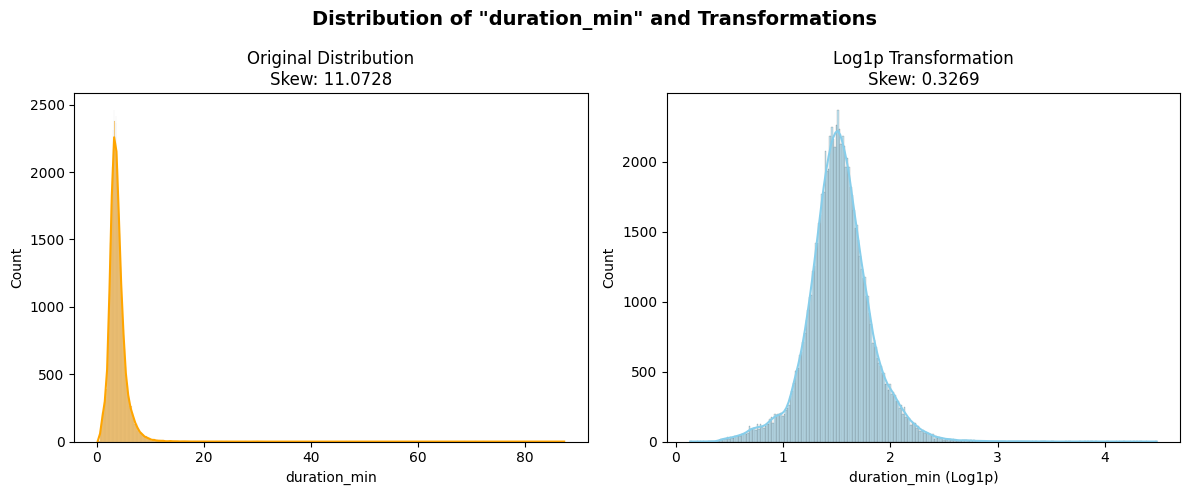

In [215]:
from src.plotting import distribution_reform

distribution_reform(df_cleaned, ['duration_min'], log_apply=True)

<Axes: xlabel='duration_class'>

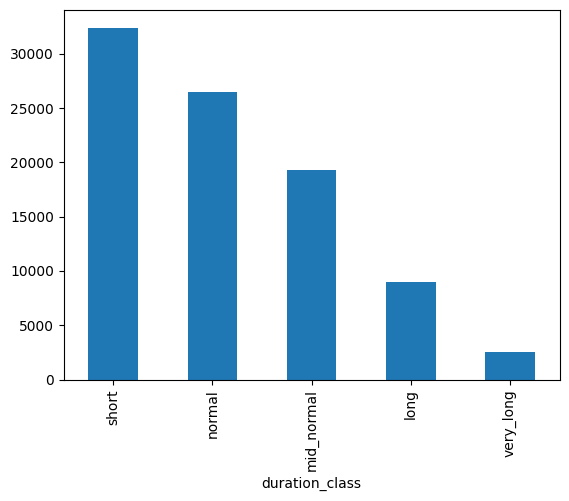

In [216]:
df_cleaned['duration_class'].value_counts().plot(kind='bar')

<Axes: xlabel='duration_log_z', ylabel='popularity'>

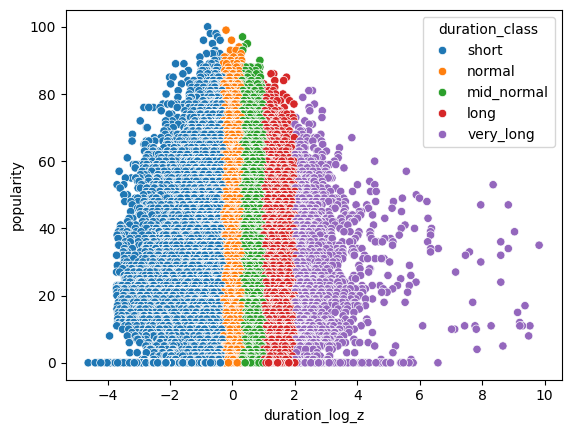

In [217]:
sns.scatterplot(
    df_cleaned,
    x='duration_log_z',
    y='popularity',
    hue='duration_class',
)

In [218]:
df_cleaned['mode'].unique()

array([1, 0])

In [219]:
df_cleaned['key_mode'] = df_cleaned['key'].astype('str') + df_cleaned['mode'].astype('str')

<Axes: xlabel='key_mode'>

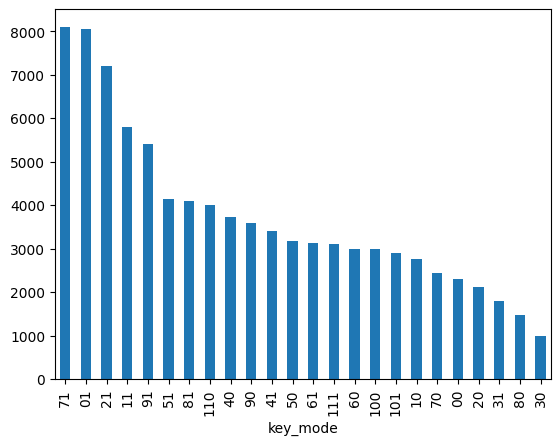

In [220]:
df_cleaned['key_mode'].value_counts().plot(kind='bar')


Column created ! 

Axes(0.1275,0.11;0.77x0.77)


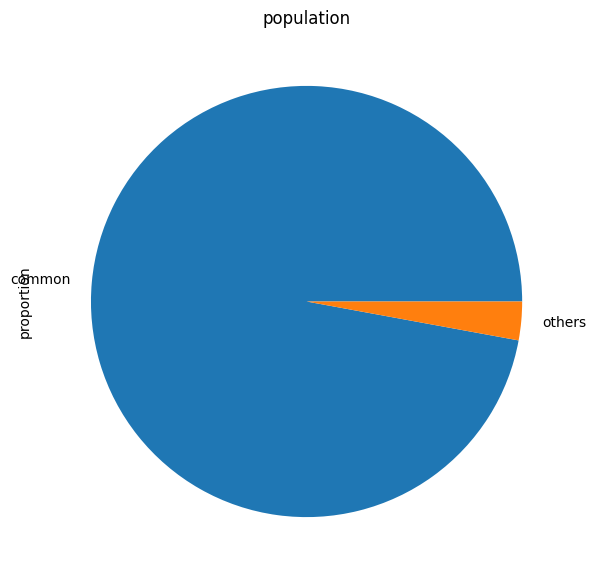

In [221]:
def feature_engineering_on_time_signature_col():
    """ 
    1. Make class (1 -> Common, 0 -> Others)
    """
    plt.figure(figsize=(7,7))
    df_cleaned['time_signature_class_boolean'] = df_cleaned['time_signature'].apply(lambda x : 1 if x in [3, 4] else 0)    
    print("Column created ! \n")
    print(df_cleaned['time_signature_class_boolean'].value_counts(normalize=True).plot(kind='pie',labels=['common', 'others']))
    plt.title('population') 



feature_engineering_on_time_signature_col()



/home/sh3rawy/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


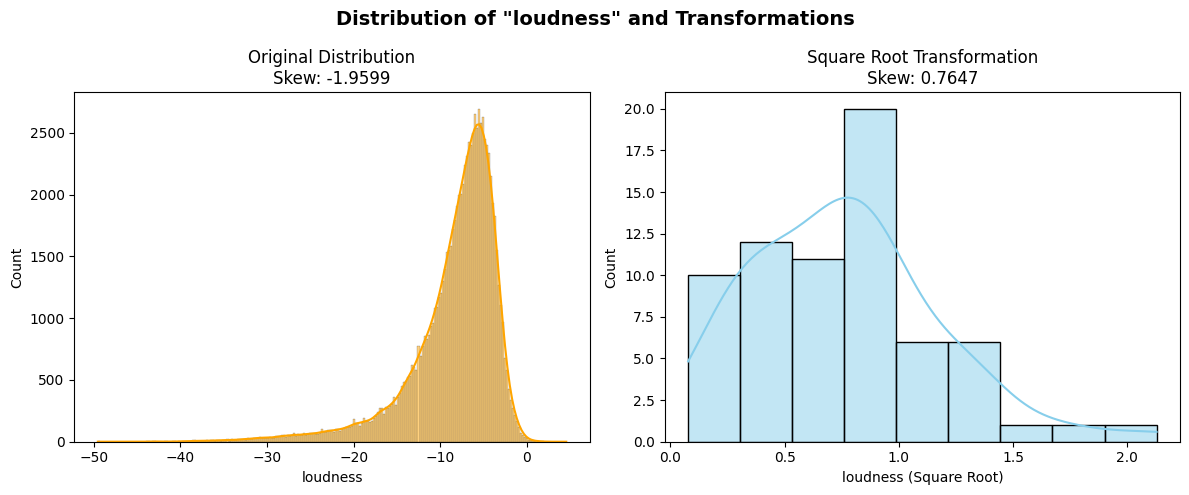

In [222]:
distribution_reform(df_cleaned,['loudness'], sqrt_apply=True)


In [223]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df_cleaned['loudness_yeo'] = pt.fit_transform(df_cleaned[['loudness']])


(-5.0, 10.0)

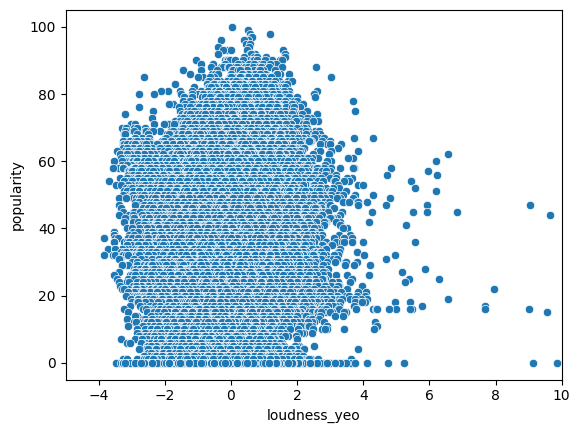

In [224]:
sns.scatterplot(
    data=df_cleaned,
    y='popularity',
    x='loudness_yeo',
)

plt.xlim([-5, 10])

skewness: loudness_yeo    0.148336
dtype: float64
----------------------------------------
       loudness_yeo
count  8.974000e+04
mean   9.754721e-17
std    1.000006e+00
min   -3.842859e+00
10%   -1.270972e+00
20%   -7.738220e-01
30%   -4.341571e-01
40%   -1.695330e-01
50%    6.765143e-02
60%    2.958064e-01
70%    5.245486e-01
80%    7.890725e-01
90%    1.149149e+00
max    2.714451e+01
----------------------------------------


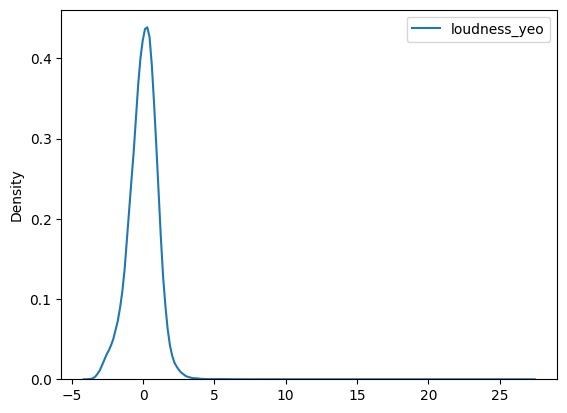

In [225]:
from src.exploration import describe_with_percentiles_show_kdeplot

describe_with_percentiles_show_kdeplot(df_cleaned,['loudness_yeo'])



In [226]:
df_cleaned['loudness_level'] = pd.qcut(df_cleaned['loudness_yeo'], q=5,  labels=['Very Quiet', 'Quiet', 'Normal', 'Loud', 'Very Loud'])


(-5.0, 10.0)

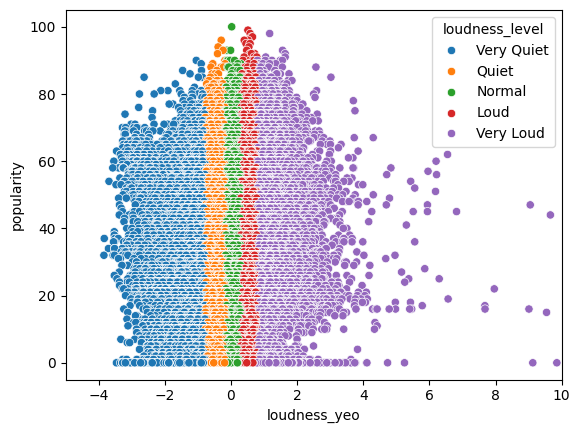

In [227]:
sns.scatterplot(
    data=df_cleaned,
    y='popularity',
    x='loudness_yeo',
    hue='loudness_level',
)

plt.xlim([-5, 10])


### Instrumentalness

skewness: instrumentalness    1.563997
dtype: float64
----------------------------------------
       instrumentalness
count      89740.000000
mean           0.173415
std            0.323849
min            0.000000
10%            0.000000
20%            0.000000
30%            0.000000
40%            0.000005
50%            0.000058
60%            0.000834
70%            0.018200
80%            0.377000
90%            0.854000
max            1.000000
----------------------------------------


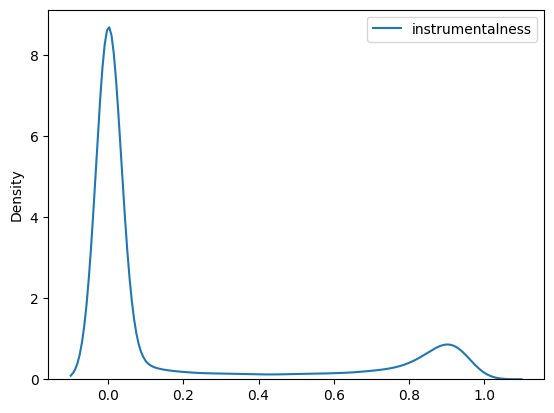

In [228]:
describe_with_percentiles_show_kdeplot(df_cleaned, ['instrumentalness'])

In [229]:
df_cleaned['is_instrumental'] = (df_cleaned['instrumentalness'] > 0.8).astype('int')

### Energy

skewness: -0.5599925386773908
----------------------------------------
count    89740.000000
mean         0.634458
std          0.256606
min          0.000000
10%          0.251000
20%          0.402000
30%          0.506000
40%          0.596000
50%          0.676000
60%          0.747000
70%          0.820000
80%          0.884000
90%          0.942000
max          1.000000
Name: energy, dtype: float64
----------------------------------------


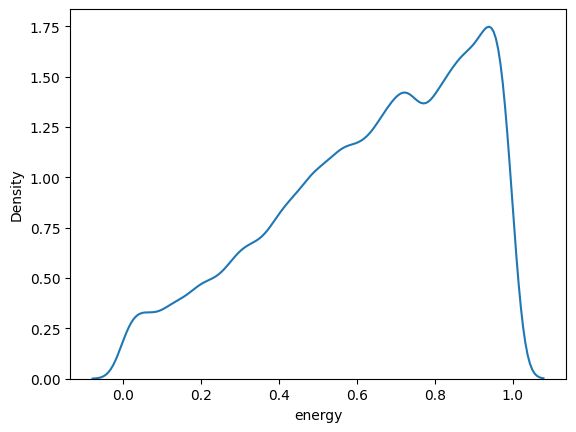

In [230]:
describe_with_percentiles_show_kdeplot(df_cleaned, 'energy')

In [231]:
(df_cleaned['energy'] > 0.9410).astype('int').value_counts()

energy
0    80612
1     9128
Name: count, dtype: int64

skewness: danceability   -0.398292
dtype: float64
----------------------------------------
       danceability
count  89740.000000
mean       0.562166
std        0.176692
min        0.000000
10%        0.318000
20%        0.416000
30%        0.480000
40%        0.529600
50%        0.576000
60%        0.621000
70%        0.668000
80%        0.718000
90%        0.782000
max        0.985000
----------------------------------------


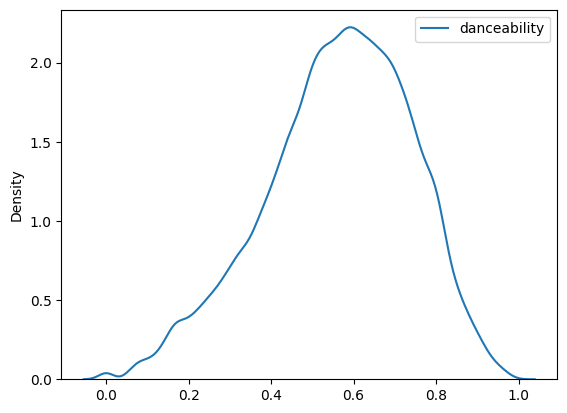

In [232]:
describe_with_percentiles_show_kdeplot(df_cleaned,['danceability'])

In [233]:
(df_cleaned['danceability'] > 0.7840).astype('int').value_counts()

danceability
0    81035
1     8705
Name: count, dtype: int64

In [234]:
df_cleaned['is_dance_hit'] = ((df_cleaned['danceability'] > 0.7840) & (df_cleaned['energy'] > 0.9410)).astype('int')

### Popularity

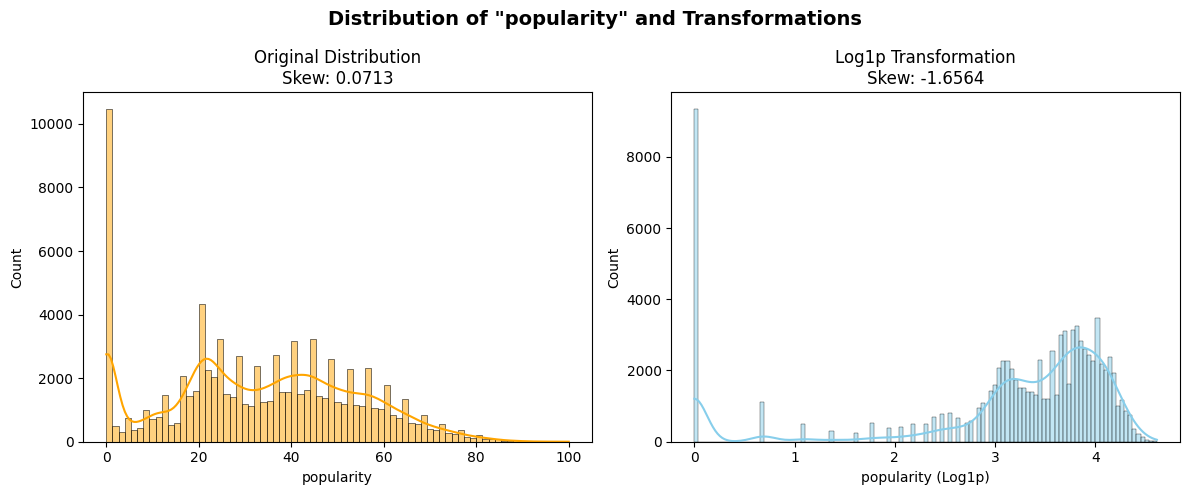

In [235]:
distribution_reform(df_cleaned, ['popularity'], log_apply=True)

skewness: popularity    0.071278
dtype: float64
----------------------------------------
         popularity
count  89740.000000
mean      33.207566
std       20.574086
min        0.000000
10%        0.000000
20%       16.000000
30%       21.000000
40%       26.000000
50%       33.000000
60%       40.000000
70%       45.000000
80%       52.000000
90%       60.000000
max      100.000000
----------------------------------------


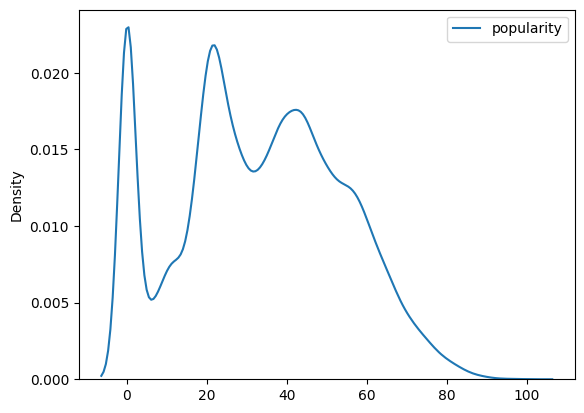

In [236]:
describe_with_percentiles_show_kdeplot(df_cleaned, ['popularity'])

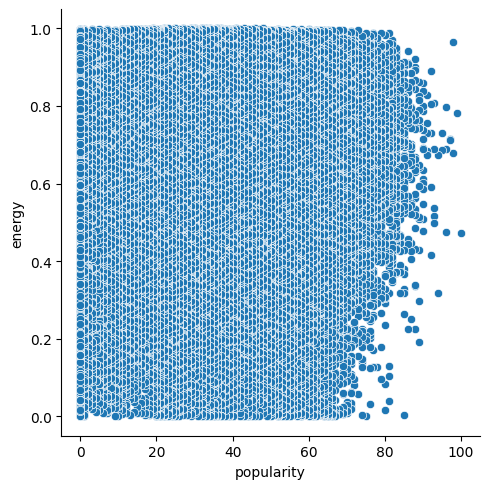

In [237]:
sns.relplot(
    df_cleaned,
    x='popularity',
    y='energy'
)

In [238]:
df_cleaned['popularity_level'] =  pd.qcut(
    df_cleaned['popularity'],
    q=[0, 0.5, 0.8, 0.9, 0.97, 1.0],
    labels=['low', 'normal', 'medium', 'high', 'very high']
) 


In [239]:
df_cleaned['popularity'].quantile(q=[0, 0.5, 0.8, 0.9, 0.97, 1.0])

0.00      0.0
0.50     33.0
0.80     52.0
0.90     60.0
0.97     71.0
1.00    100.0
Name: popularity, dtype: float64

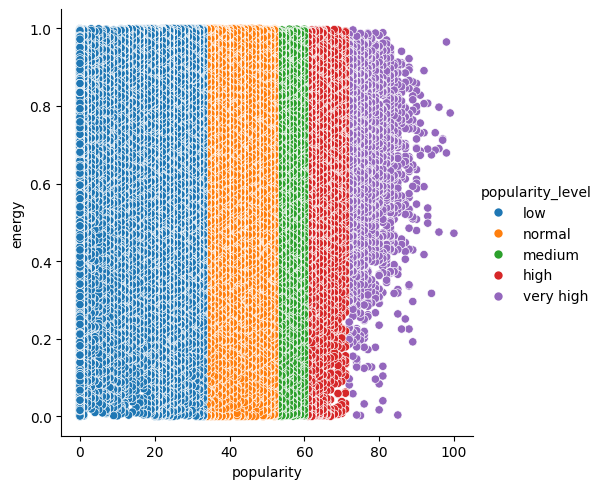

In [240]:
sns.relplot(
    df_cleaned,
    x='popularity',
    y='energy',
    hue='popularity_level',
)

In [241]:
df_cleaned['popularity_level'].value_counts(normalize= False)

popularity_level
low          45148
normal       27020
medium        8735
high          6467
very high     2370
Name: count, dtype: int64

### Artist

In [242]:
artists_popularity =  df_cleaned.groupby(['artists'])['popularity'].mean()
df_cleaned['artists_avg_popularity'] = df_cleaned['artists'].map(artists_popularity)

df_cleaned[['artists_avg_popularity', 'artists']].sample(6)



,artists_avg_popularity,artists
index,,
111380,20.500000,Cibo Matto
106346,37.500000,Kenneth & The Knutters
11274,43.416667,The Rolling Stones
49450,48.666667,Neolux
91452,69.608696,The 1975
113757,36.250000,Hillsong Kids


In [243]:


artists_popularity =  df_cleaned.groupby(['artists'])['popularity'].mean()
df_cleaned['artists_avg_popularity'] = df_cleaned['artists'].map(artists_popularity)

df_cleaned[['artists_avg_popularity', 'artists']].sample(6)



,artists_avg_popularity,artists
index,,
23889,0.000000,Huxley;SHE KORO
72473,48.065217,Bullet For My Valentine
72662,52.333333,Suicide Silence
12349,22.000000,Roman Tam
66272,15.769231,Babyboomboom
104300,44.500000,Bebe


In [244]:
df_cleaned['artist_song_count'] = df_cleaned['artists'].map(df_cleaned['artists'].value_counts())

In [245]:
print(df_cleaned.columns[df_cleaned.columns.str.startswith('artist')])

Index(['artists', 'artists_avg_popularity', 'artist_song_count'], dtype='object')


### Album

In [246]:
df_cleaned['album_freq'] = df_cleaned['album_name'].map(df_cleaned['album_name'].value_counts())

In [247]:
df_cleaned['album_freq'].nlargest(3)

index
52001    110
52066    110
52229    110
Name: album_freq, dtype: int64

### track_genre

In [248]:
print(df_cleaned['track_genre'].unique())
print('\n\n')
print(df_cleaned['track_genre'].nunique())

['dance' 'hip-hop' 'reggae' 'edm' 'latino' 'reggaeton' 'latin' 'pop'
 'piano' 'alt-rock' 'chill' 'rock' 'folk' 'groove' 'songwriter'
 'progressive-house' 'indie' 'country' 'spanish' 'garage' 'metal' 'k-pop'
 'indie-pop' 'house' 'indian' 'soul' 'synth-pop' 'emo' 'alternative'
 'punk' 'trance' 'electro' 'grunge' 'sleep' 'techno' 'british' 'hard-rock'
 'pagode' 'german' 'funk' 'singer-songwriter' 'j-pop' 'dancehall' 'sad'
 'swedish' 'acoustic' 'brazil' 'r-n-b' 'punk-rock' 'blues' 'pop-film'
 'disco' 'hardcore' 'french' 'ambient' 'chicago-house' 'psych-rock'
 'children' 'j-dance' 'industrial' 'jazz' 'j-rock' 'ska' 'anime'
 'power-pop' 'salsa' 'turkish' 'deep-house' 'rock-n-roll' 'electronic'
 'comedy' 'afrobeat' 'show-tunes' 'metalcore' 'party' 'rockabilly'
 'death-metal' 'cantopop' 'disney' 'classical' 'guitar' 'mandopop'
 'hardstyle' 'idm' 'world-music' 'drum-and-bass' 'new-age' 'bluegrass'
 'minimal-techno' 'dubstep' 'dub' 'opera' 'trip-hop' 'mpb' 'club' 'malay'
 'happy' 'breakbeat' 'go

In [249]:
display(df_cleaned['track_genre'].value_counts().nlargest(5))
display(df_cleaned['track_genre'].value_counts().nsmallest(5))

track_genre
tango     999
sleep     998
study     998
comedy    995
idm       995
Name: count, dtype: int64

track_genre
reggae        250
songwriter    275
latin         306
edm           337
indie         341
Name: count, dtype: int64

In [250]:
pd.get_dummies(df_cleaned, columns=['track_genre'], prefix='is_genre_is').shape

(89740, 149)

### tempo

skewness: tempo    0.182744
dtype: float64
----------------------------------------
              tempo
count  89740.000000
mean     122.058134
std       30.117651
min        0.000000
10%       83.219000
20%       94.873800
30%      103.782000
40%      113.980000
50%      122.013000
60%      128.006000
70%      136.010000
80%      146.845400
90%      165.968000
max      243.372000
----------------------------------------


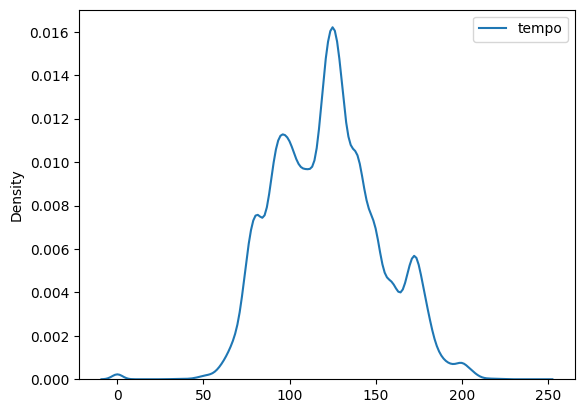

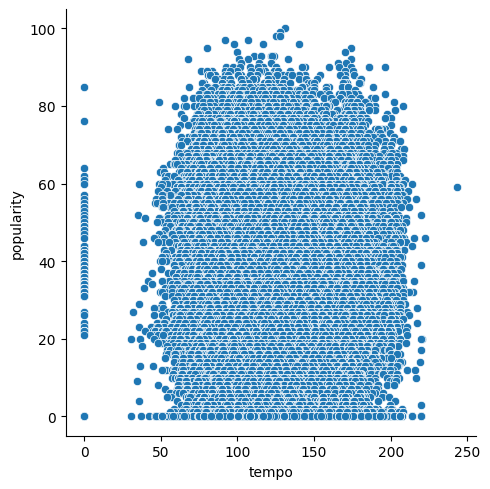

In [251]:
describe_with_percentiles_show_kdeplot(df_cleaned, ['tempo'])
sns.relplot(
    df_cleaned,
    x='tempo',
    y='popularity'
)

In [252]:
df_cleaned['tempo_class'] = pd.qcut(
    df_cleaned['tempo'],
    q=5,
    labels=['very slow', 'normal', 'medium', 'fast', 'very fast']
)


In [253]:
df_cleaned['tempo_class'] = pd.cut(
    df_cleaned['tempo'],
    bins=[0, 40, 80, 180, 210, float('inf')],
    labels=['very slow', 'slow', 'normal', 'fast', 'very fast'])

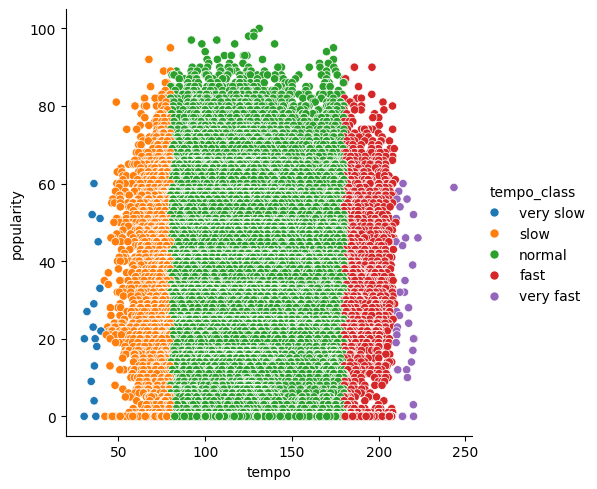

In [254]:
sns.relplot(
    df_cleaned,
    x='tempo',
    y='popularity',
    hue='tempo_class',
)

In [255]:
df_cleaned['temp_zscore'] = (df_cleaned['tempo'] - df_cleaned['tempo'].mean()) / (df_cleaned['tempo'].std())

<Axes: xlabel='temp_zscore', ylabel='Density'>

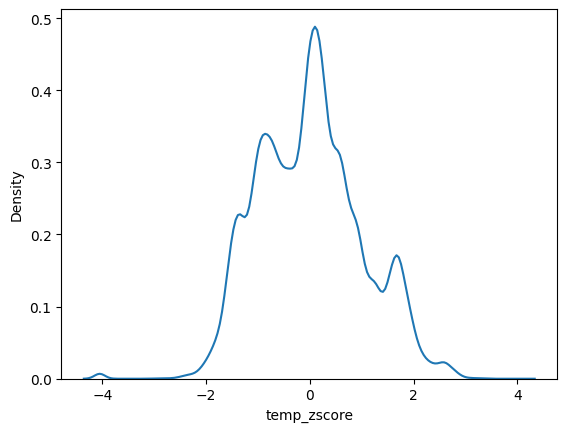

In [256]:


sns.kdeplot(df_cleaned['temp_zscore'])



In [257]:
df_cleaned['tempo_vs_genre'] = df_cleaned['tempo'] - df_cleaned.groupby('track_genre')['tempo'].transform('mean')


### Energy rank

In [258]:
df_cleaned['energy_rank_pct'] = df_cleaned['energy'].rank(pct=True)


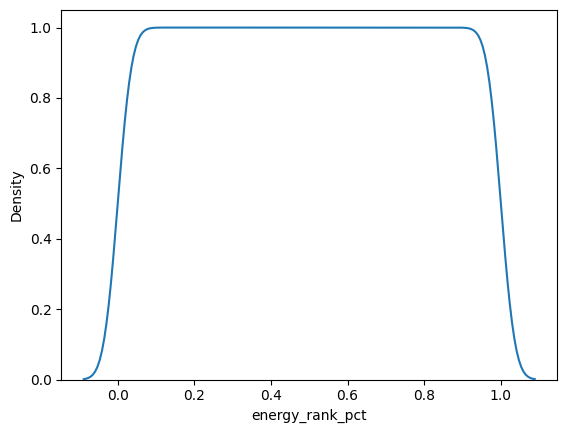

In [259]:
sns.kdeplot(df_cleaned['energy_rank_pct'])
df_cleaned['loud_energy_ratio'] = (df_cleaned['loudness'] + 50) / (df_cleaned['energy'] + 1e-6)

## Advanced preprocessing

In [260]:
#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler
#from tqdm import tqdm 

#scaler = StandardScaler()
#features = df[['danceability', 'energy', 'valence', 'tempo']]
#features_scaled = scaler.fit_transform(features)

#inertia = []
#k_range = range(20,30)

#for k in tqdm(k_range, desc="working :"):
#    km = KMeans(n_clusters=k, random_state=0)
#    km.fit(features_scaled)
#    inertia.append(km.inertia_)


In [261]:
#plt.plot(k_range, inertia, marker='o')
#plt.title("Elbow Method")
#plt.xticks(k_range)
#plt.axvline(20, c='r')
#plt.grid()
#plt.show()

### clustering

In [262]:
from sklearn.cluster import KMeans

features = df_cleaned[['acousticness', 'valence']]

km = KMeans(n_clusters=11, random_state=0).fit(features)
df_cleaned['acoustic_valence_mood'] = km.labels_

df_cleaned['acoustic_valence_mood'].value_counts()

acoustic_valence_mood
0     13189
9     12840
5     11449
10     9603
3      7686
6      6860
1      6011
4      5960
7      5756
2      5339
8      5047
Name: count, dtype: int64

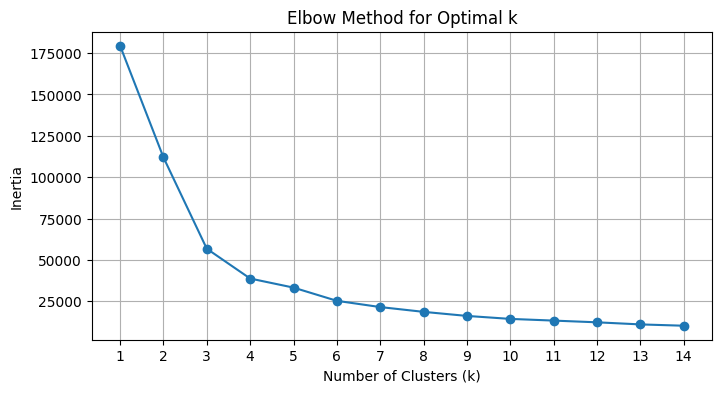

In [263]:
features = df_cleaned[['acousticness', 'valence']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

inertia = []
k_range = range(1, 15)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(features_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


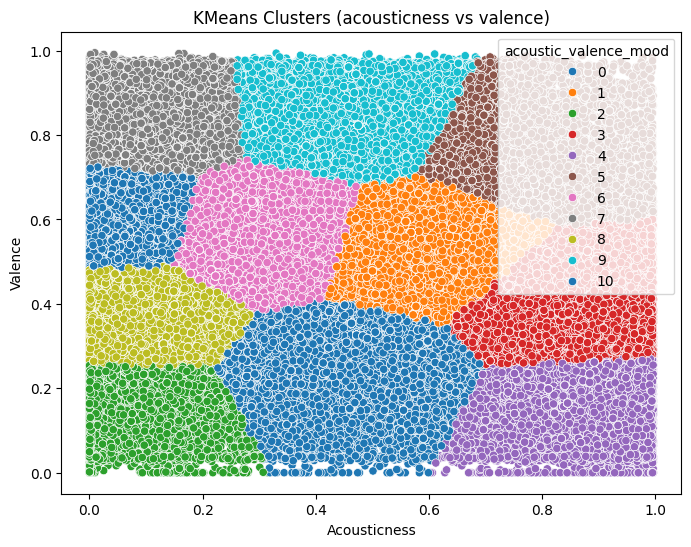

In [264]:
k_final = 11  
km = KMeans(n_clusters=k_final, random_state=0)
df_cleaned['acoustic_valence_mood'] = km.fit_predict(features_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=features['acousticness'],
    y=features['valence'],
    hue=df_cleaned['acoustic_valence_mood'],
    palette='tab10',
    legend='full'
)
plt.title('KMeans Clusters (acousticness vs valence)')
plt.xlabel('Acousticness')
plt.ylabel('Valence')
plt.show()


### PCA

In [265]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df_cleaned['mood_pca'] = pca.fit_transform(df_cleaned[['valence', 'energy', 'danceability']])

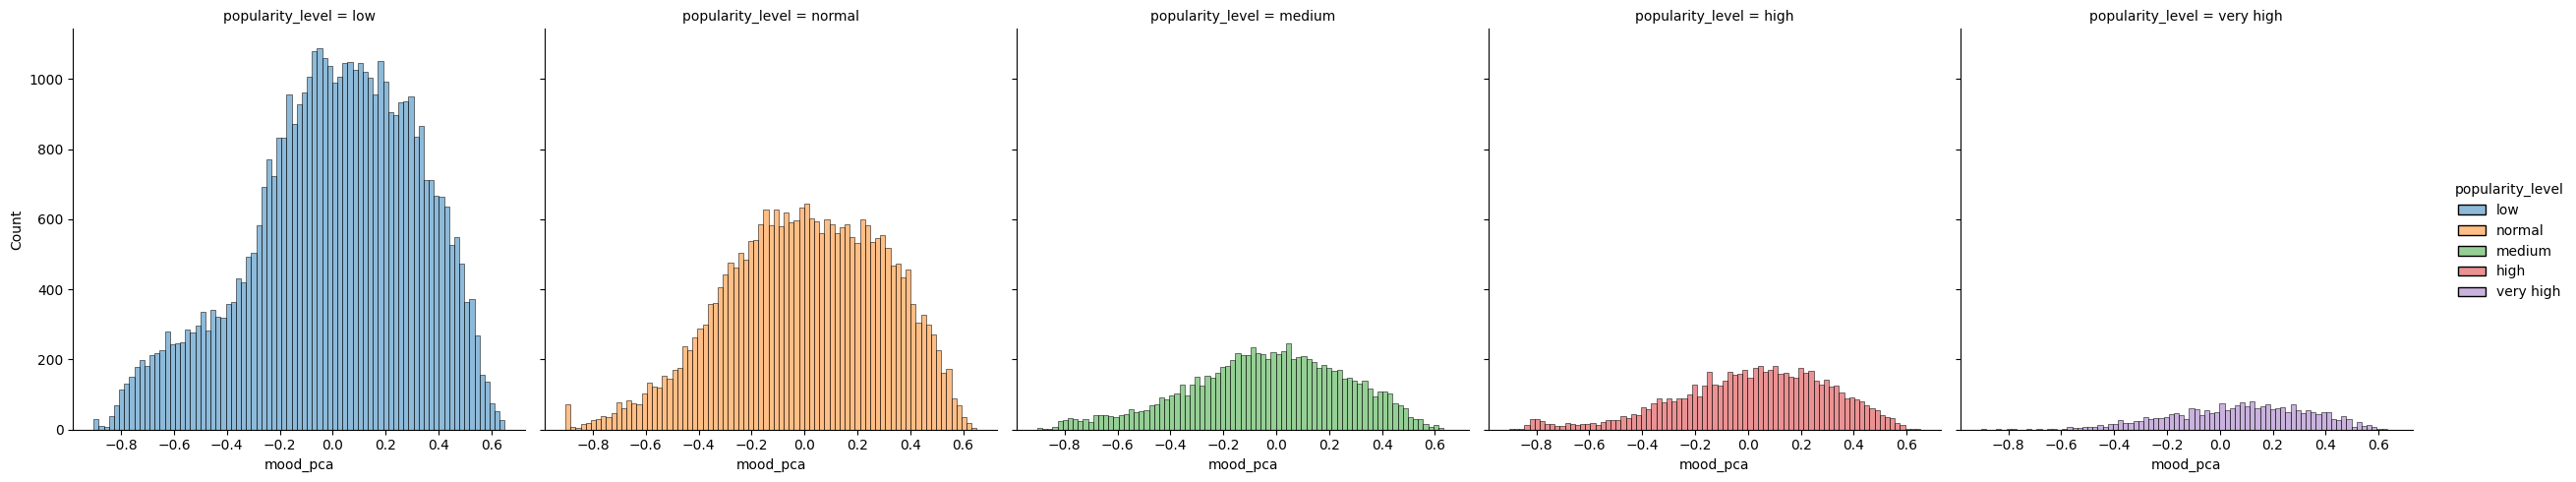

In [266]:
sns.displot(
    df_cleaned,
    x='mood_pca',
    hue='popularity_level',
    col='popularity_level'
)

In [267]:
df_cleaned[['is_instrumental','is_dance_hit']]


,is_instrumental,is_dance_hit
index,,
20001,0,0
51664,0,0
88410,0,0
30003,0,0
68304,0,0
...,...,...
64891,0,0
64890,0,0
64888,0,0


### compining features

In [268]:
df_cleaned[['acousticness', 'instrumentalness', 'loudness']].describe()

,acousticness,instrumentalness,loudness
count,89740.000000,89740.000000,89740.000000
mean,0.328285,0.173415,-8.498994
std,0.338321,0.323849,5.221518
min,0.000000,0.000000,-49.531000
25%,0.017100,0.000000,-10.322250
50%,0.188000,0.000058,-7.185000
75%,0.625000,0.097625,-5.108000
max,0.996000,1.000000,4.532000


In [269]:
df_cleaned['happy_dance'] = df_cleaned['valence'] * df_cleaned['danceability']
df_cleaned['loudness_intensity'] = df_cleaned['energy'] * (df_cleaned['loudness'] + (abs(df_cleaned['loudness']).min()))
df_cleaned['acoustics_instrumental'] = df_cleaned['instrumentalness'] * df_cleaned['acousticness']

len(df_cleaned.columns)


46

In [270]:
df_cleaned.columns


Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'key_sin',
       'key_cos', 'duration_min', 'duration_log', 'duration_class',
       'duration_log_z', 'key_mode', 'time_signature_class_boolean',
       'loudness_yeo', 'loudness_level', 'is_instrumental', 'is_dance_hit',
       'popularity_level', 'artists_avg_popularity', 'artist_song_count',
       'album_freq', 'tempo_class', 'temp_zscore', 'tempo_vs_genre',
       'energy_rank_pct', 'loud_energy_ratio', 'acoustic_valence_mood',
       'mood_pca', 'happy_dance', 'loudness_intensity',
       'acoustics_instrumental'],
      dtype='object')